<a href="https://colab.research.google.com/github/njafarov/Optimization_MINLP/blob/main/Callenge1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -N -q "https://ampl.com/dl/open/couenne/couenne-linux64.zip"
!unzip -o -q couenne-linux64
!pip install pyomo
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


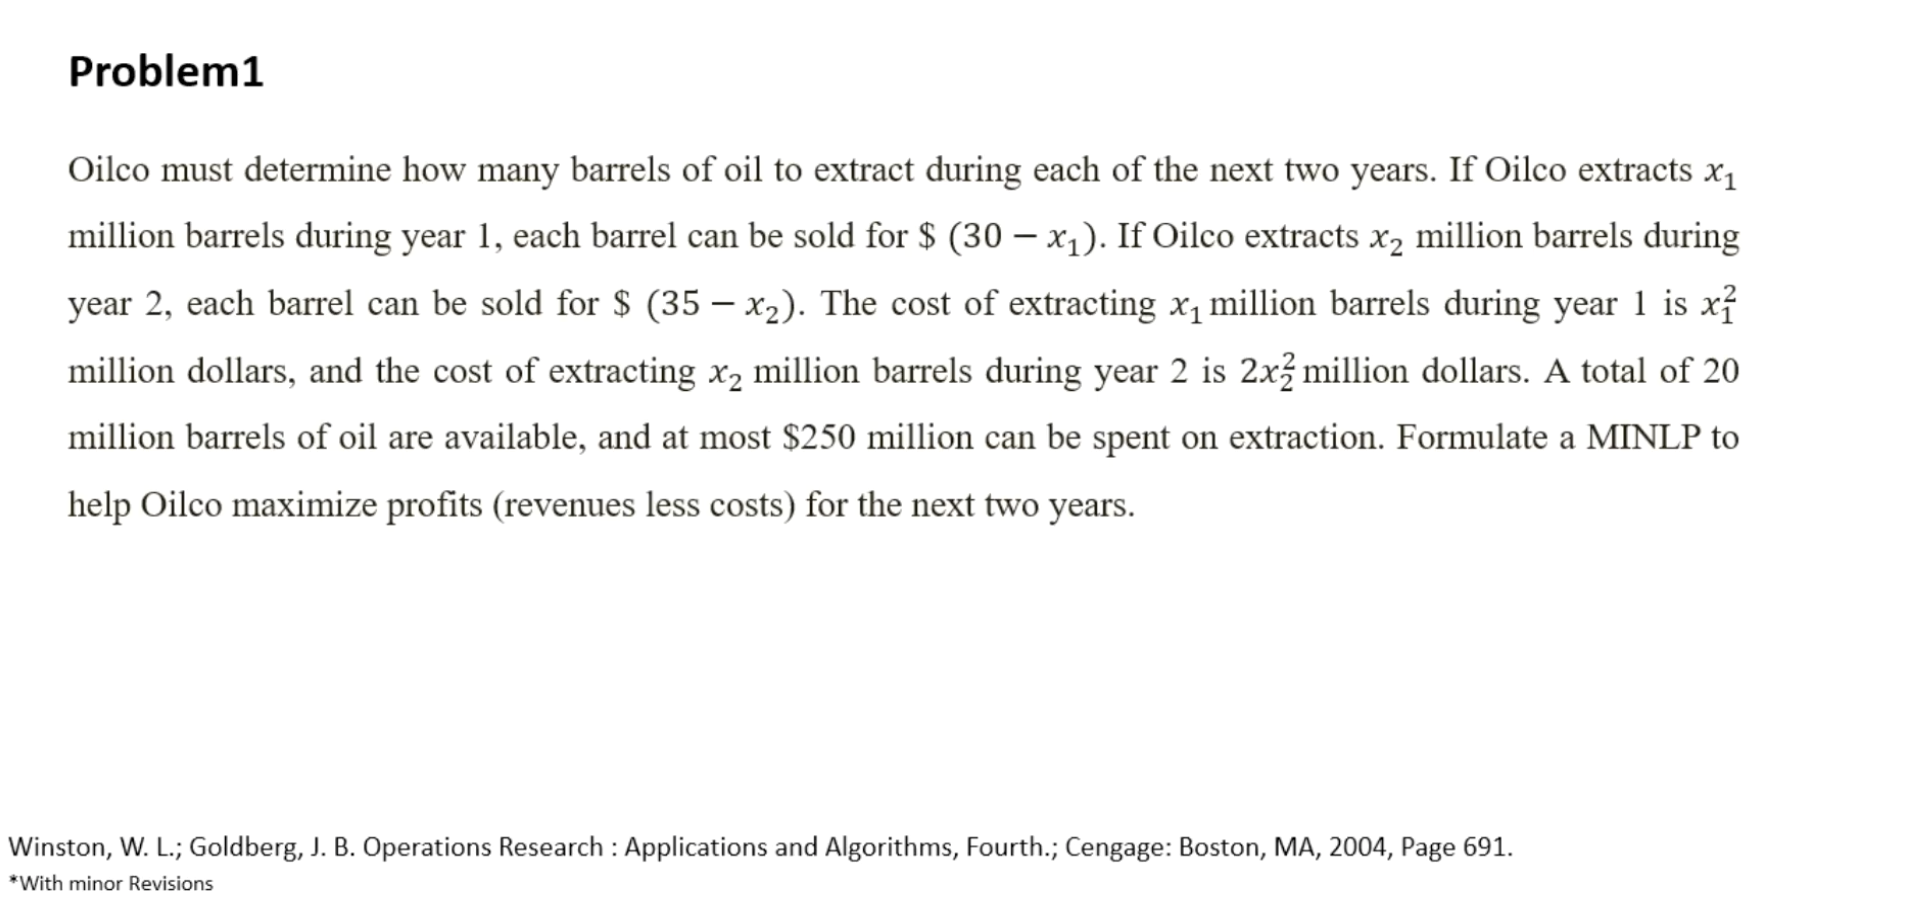

In [ ]:
from ast import expr
from pyomo.core.base import initializer
# Initialize the model
model = pyo.ConcreteModel()

# Define Sets
model.i = pyo.RangeSet(1,2)

# Decision Variables
model.x = pyo.Var(model.i, domain = pyo.NonNegativeIntegers)
x = model.x

#Objection function
model.Obj = pyo.Objective(expr = ((x[1]*(30-x[1])+x[2]*(35-x[2]))-((x[1]**2)+(2*x[2]**2))),
                          sense=pyo.maximize)

# Constrains
model.Cons1 = pyo.Constraint(expr=sum(x[i] for i in model.i)<=20)
model.Cons2 = pyo.Constraint(expr = x[1]**2+2*x[2]**2<=250)

# Solution
Solver = SolverFactory('couenne',executable='/content/couenne')
results = Solver.solve(model)

print(results)
print("Objective function: ", model.Obj())
for i in model.i:
  print("The amount of oil ",i,"is ", x[i]())


Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 2
  Sense: unknown
Solver: 
- Status: ok
  Message: couenne\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.050241947174072266
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

Objective function:  214.0
The amount of oil  1 is  8.0
The amount of oil  2 is  6.0
